## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
%matplotlib inline

## Q1 - Is the distribution of body temperatures normal?

In [4]:
## Take a look at the data

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
temps = df.temperature.sort_values()

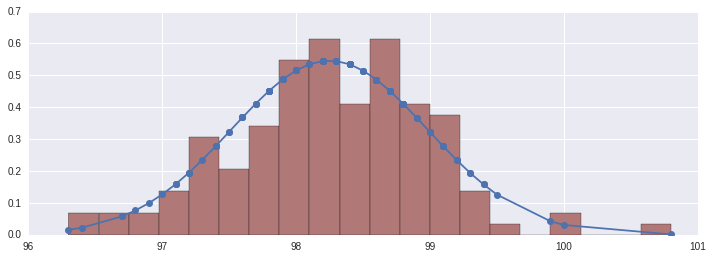

In [6]:
fig, axes = plt.subplots(figsize = (12,4))
fit = stats.norm.pdf(temps, np.mean(temps), np.std(temps))
axes.plot(temps, fit, '-o')
axes.hist(temps, bins = 20, normed = True, color = sns.desaturate("indianred",0.5));

From the histogram above of the body temperature data, overlayed with the fitted normal distribution, the data does appear to be normally distributed, but not unimodal. For further clarification, a normal probability plot of the standardized data against the standard normal distribution should provide confirmation.

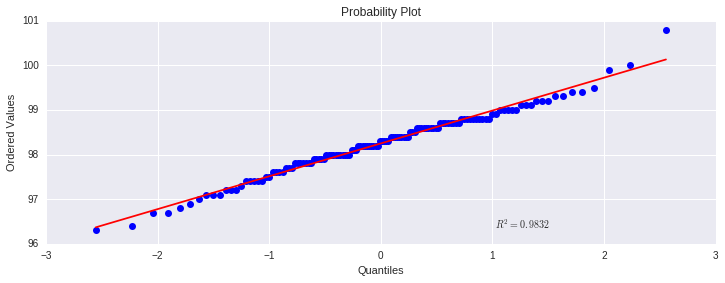

In [7]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
res = stats.probplot(temps, dist = 'norm', plot = plt)

Few, if any, points deviate from the straight line adding further confidence to our belief that the underlying distribution in the temperature data set is normal

In [8]:
stats.mstats.normaltest(temps)

NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)

normaltest in scipy returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen. The p-value here is >> 0.05, more than large enough to fail to reject the null hypothesis.

## Q2 - Is the true population mean really 98.6 degrees F?

In [9]:
n = len(temps)
sample_mean = np.mean(temps)
sample_sd = np.std(temps)

In [10]:
print("(n = {}, sample_mean = {}, sample_sd = {})".format(n, sample_mean, sample_sd))

(n = 130, sample_mean = 98.24923076923076, sample_sd = 0.7303577789050376)


In [11]:
std_error = sample_sd/(np.sqrt(n))
std_error

0.064056614695193345

In [12]:
z_score = (sample_mean - 98.6)/std_error
z_score

-5.4759252020783391

In [13]:
stats.norm.cdf(z_score)*2

4.3523151658767027e-08

2-tailed as we are looking at both tails and aren't interested in one particular change in direction.

In [14]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

p-value is extremely small << 0.05. Can reject the null hypothesis that the true population mean is 98.6 degrees Fahrenheit on this basis.

We used a z-test in this instance as the sample size is sufficiently large. How would the result be different if we used the t-test?

In [15]:
"{0:.10f}".format(stats.t.cdf(z_score, len(temps) - 1)*2)

'0.0000002189'

Again the p-value is extremely small so we would still reject the null hypothesis when using the t-test.

## Q3 - At what temperature should we consider someone's temperature to be "abnormal"?

We will consider a 95% confidence interval as a good precursor for normality in this case. Any values that fall outside this interval will be considered "abnormal".

First the margin of error is constructed using the following formula

M.E = critical value x standard error

In [16]:
CV = stats.norm.ppf(.975)

In [17]:
marginError = CV * std_error
marginError

0.12554865777413812

In [18]:
CI_95 = (sample_mean - marginError, sample_mean + marginError)
CI_95

(98.123682111456631, 98.374779427004896)

In [19]:
stats.norm.interval(.95,loc=sample_mean,scale=std_error)

(98.123682111456631, 98.374779427004896)

In [20]:
marginError/sample_mean

0.0012778589388554975

## Q4 - Is there a significant difference between males and females in normal temperature?

We want to perform a hypothesis test for difference between two means.
Let's take a significance level of 5%. So no more than 5% chance of rejecting the null hypothesis when it is actually true.

First lets get our sample statistics for both Men and Women.

In [21]:
Men = df[df.gender == "M"]
Women = df[df.gender == "F"]
Men_mean = np.mean(Men.temperature)
Women_mean = np.mean(Women.temperature)
Men_var = np.var(Men.temperature, ddof = 1)
Women_var = np.var(Women.temperature, ddof = 1)
Diff_mean = Men_mean - Women_mean
Diff_mean

-0.289230769230727

In [22]:
Men_stdErr = np.sqrt(Men_var/len(Men.temperature))
Women_stdErr = np.sqrt(Women_var/len(Women.temperature))
Diff_stdErr = np.sqrt((Men_var/len(Men.temperature)) + (Women_var/len(Women.temperature)))
Diff_stdErr

0.12655395041982642

Under the null hypothesis we expect there to be no difference between the means. 

In [24]:
zscore = Diff_mean/Diff_stdErr
zscore

-2.2854345381652741

We want to consider both tails as we are interested in changes in both directions.

In [25]:
stats.norm.sf(abs(zscore))*2

0.02228736076067726

This p-value of about 2% suggests that under the null hypothesis, there is only a 1 in 50 chance of getting a result this extreme or more. Since the p-value is smaller than the significance level (0.05), there is convincing evidence to reject the null hypothesis that there is no difference in the mean temperature between males and females. Therefore, there is a statistically-significant difference between the mean body temperatures of males and females.


In [26]:
CV = stats.norm.ppf(.975)
CV

1.959963984540054

In [28]:
CV * Diff_stdErr

0.24804118492412744

So if we assume there is no difference, there is only a 5% chance of having a difference between the means of men and female of more than 0.248.

Therefore with a difference of 0.289, there is an even smaller probability of this difference occuring by chance, so we reject the null hypothesis.

Alternatively we could perform this hypothesis step using packages.

In [32]:
ztest(Men.temperature, Women.temperature)

(-2.2854345381656103, 0.02228736076065755)

If we were to use a t-test instead (population variance is unknown)

In [33]:
stats.ttest_ind(Men.temperature, Women.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)